# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Reframe the Business task Data Science Problem

The task is to identify the key drivers of used car prices.  This is a regression problem where we aim to predict the price of a used car based on a number of features.  We will use a dataset of used car sales to build a model that can predict the price of a used car based on its features. The dependent variable is the car's price, while the independent variables are possible predictors such as the make, model, year, mileage, condition, and additional features.  The model will be used to identify the key drivers of used car prices. The model's performance will be evaluated using R-squared, Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) to guarantee reliable and actionable results.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [58]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score







In [59]:
# Load the dataset

df = pd.read_csv('data/vehicles.csv')
df.head()




,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [60]:
# Find missing values
df.isnull().sum()



id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [61]:
# Drop missing values
df.dropna(inplace=True)

df.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

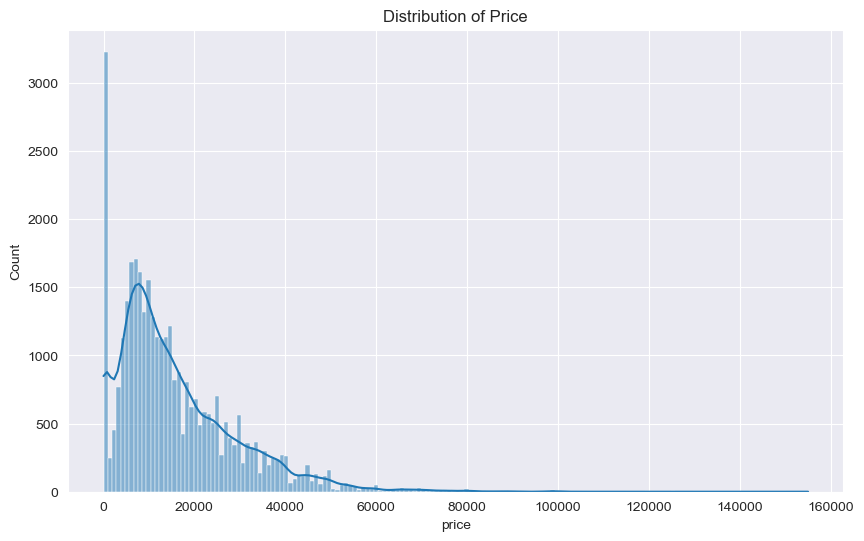

In [62]:
# Display the distribution of the target variable

plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()



In [63]:
# Drop rows where price is 0

df = df[df['price'] > 0]


In [64]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
215,7316482063,birmingham,4000,2002.0,toyota,echo,excellent,4 cylinders,gas,155000.0,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
219,7316429417,birmingham,2500,1995.0,bmw,525i,fair,6 cylinders,gas,110661.0,clean,automatic,WBAHD6322SGK86772,rwd,mid-size,sedan,white,al
268,7315946365,birmingham,9000,2008.0,mazda,miata mx-5,excellent,4 cylinders,gas,56700.0,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
337,7315354216,birmingham,8950,2011.0,ford,f-150,excellent,6 cylinders,gas,164000.0,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
338,7315349921,birmingham,4000,1972.0,mercedes-benz,benz,fair,6 cylinders,gas,88100.0,clean,automatic,1.14023E+13,rwd,full-size,coupe,silver,al


In [65]:
# 

# Data Summary 

After loading the dataset, we found that there were missing values in the dataset. We decided to drop the missing values to ensure the quality of the data. We also found that there were some rows where the price was 0, which is not possible. We dropped these rows as well. The summary statistics of the dataset show that the average price of a used car is around $19,000, with a minimum price of $1 and a maximum price of $375,000. The distribution of the target variable, price, is right-skewed, with most cars priced below $50,000.
The dataset contains 426,880 entries and 18 features related to various aspects of used vehicles.
Features include identifiers (like id and VIN), vehicle characteristics (manufacturer, model, year, cylinders, etc.), condition, and transactional details (price, title_status). The dataset also contains features like odometer, transmission, drive, fuel, and type of vehicle. These features will be used to predict the price of a used car.

The dataset includes a wide range of years, from 1900 to 2022.
There are missing values in several important columns like year, manufacturer, model, condition, and odometer.
The price variable, which is our target variable, has a wide range, from 0 to over 3 billion, suggesting possible outliers or data entry errors.
Some entries in the initial rows have missing values across multiple field
The dataset contains a mix of numerical and categorical variables, which will require preprocessing before modeling.




### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Data Cleaning: Address missing values and filter out unreasonable or incorrect entries (e.g., extremely high prices, very old vehicle years).
Feature Selection: Decide which features are relevant for the price prediction model.
Exploratory Data Analysis: Further analyze the distribution of key variables and their relationships.

In [66]:


# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Drop rows with missing values

df.dropna(inplace=True)

# Drop rows with unreasonable prices
df[(df['price'] > 100) & (df['price'] < 100000)]

# Drop rows with unreasonable years
df = df[df['year'] > 1900]

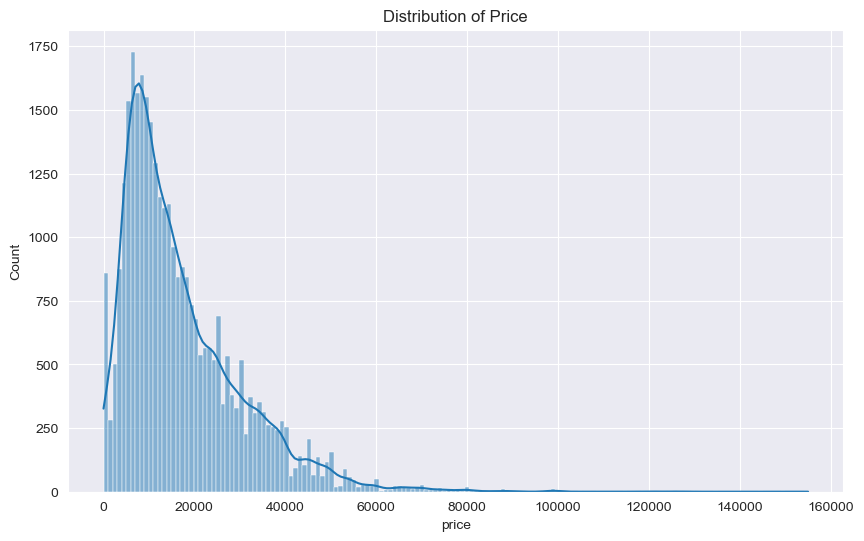

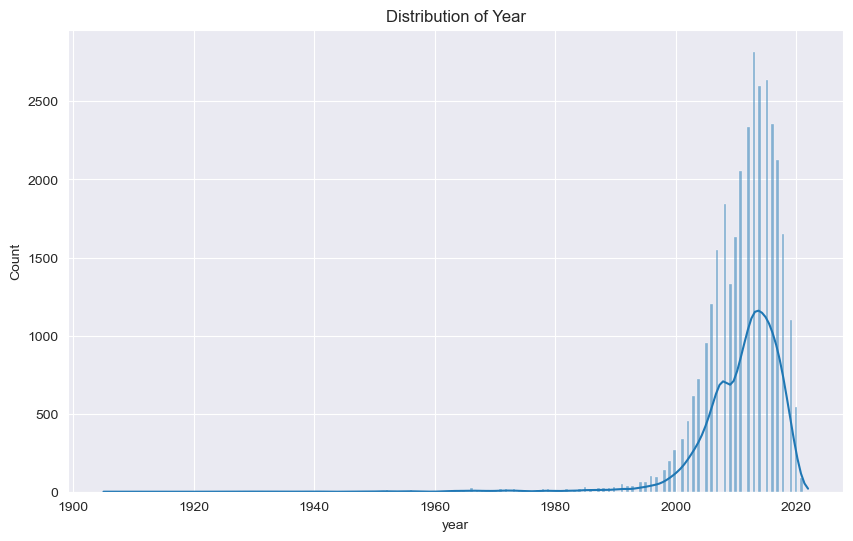

In [67]:
# Visualize the distribution of the price and year variables

plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(df['year'], kde=True)
plt.title('Distribution of Year')
plt.show()



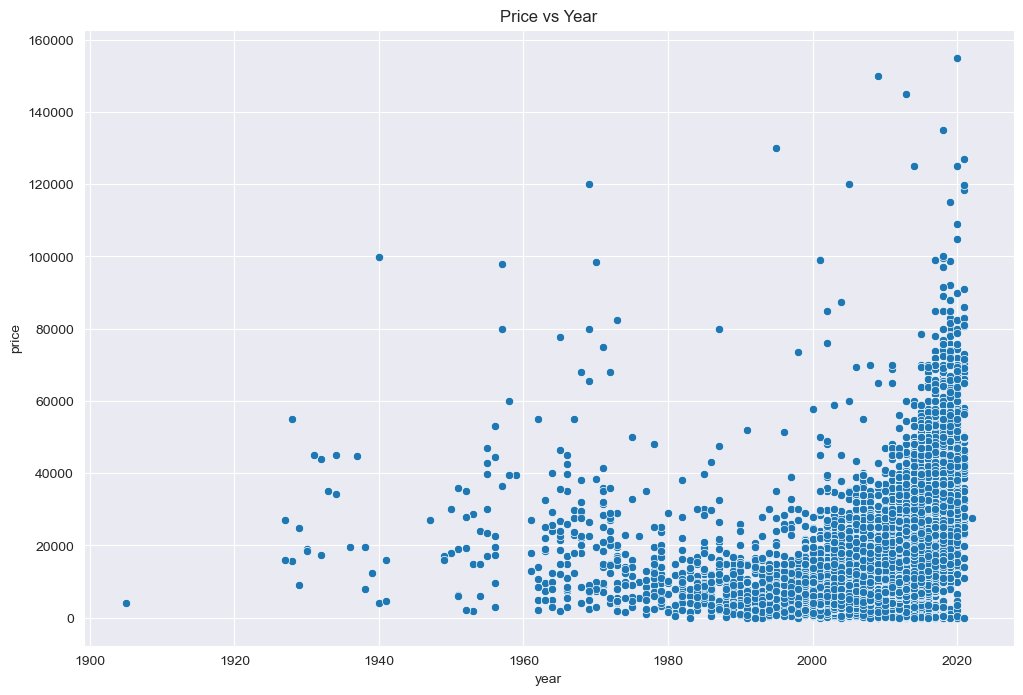

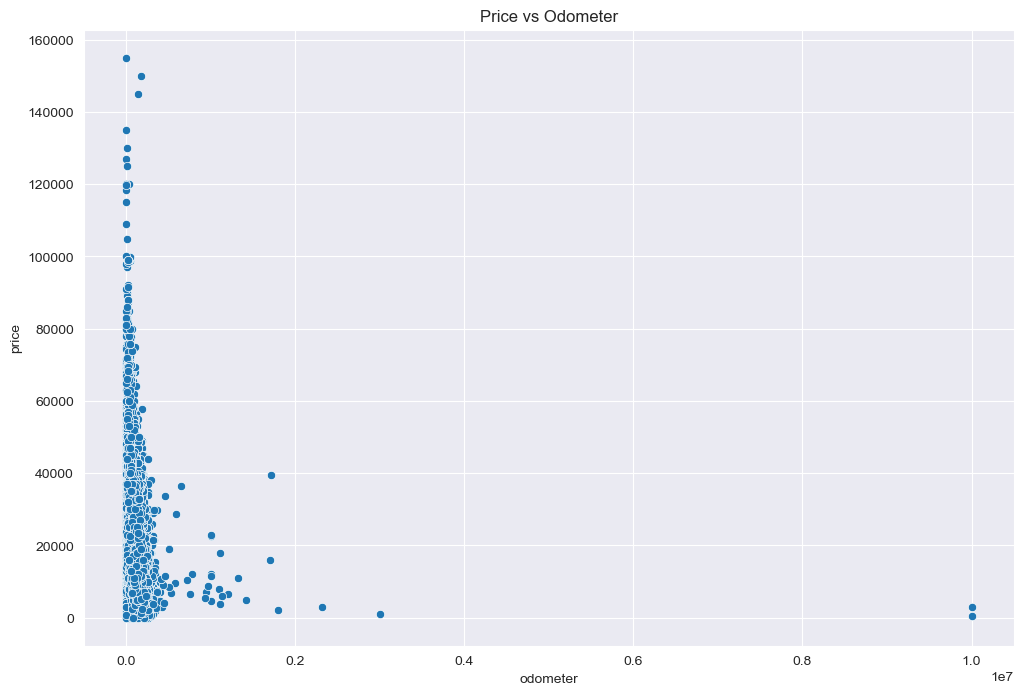

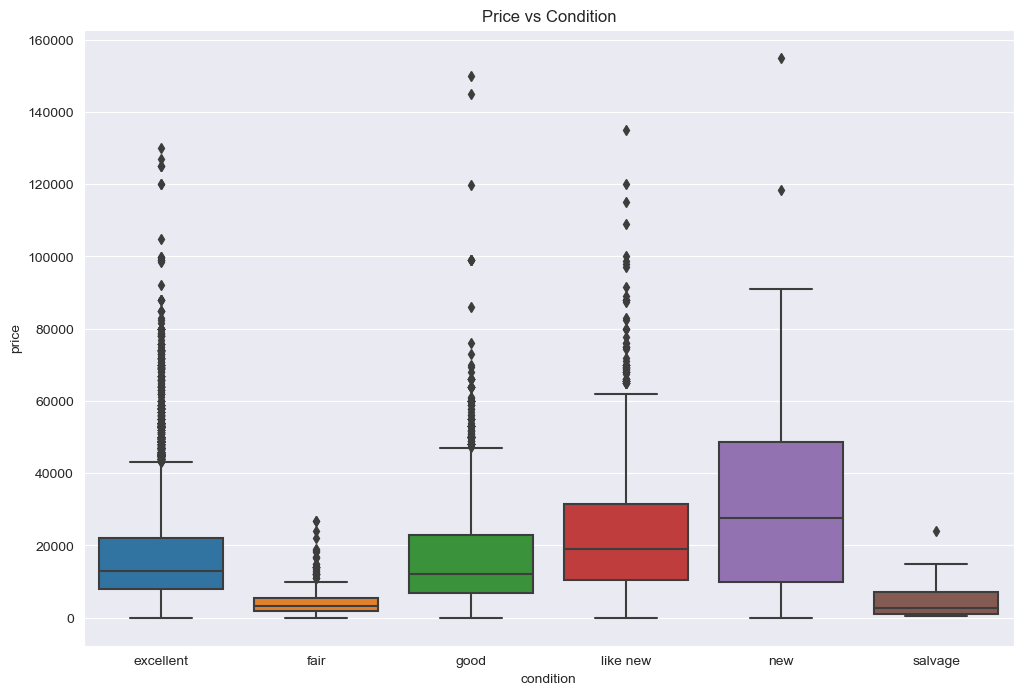

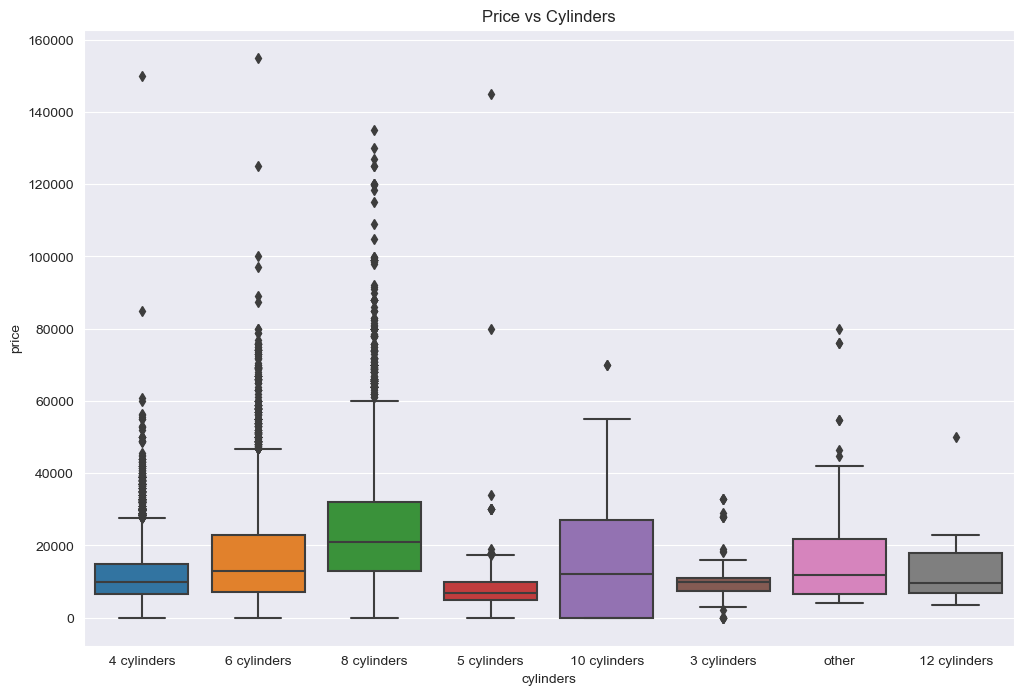

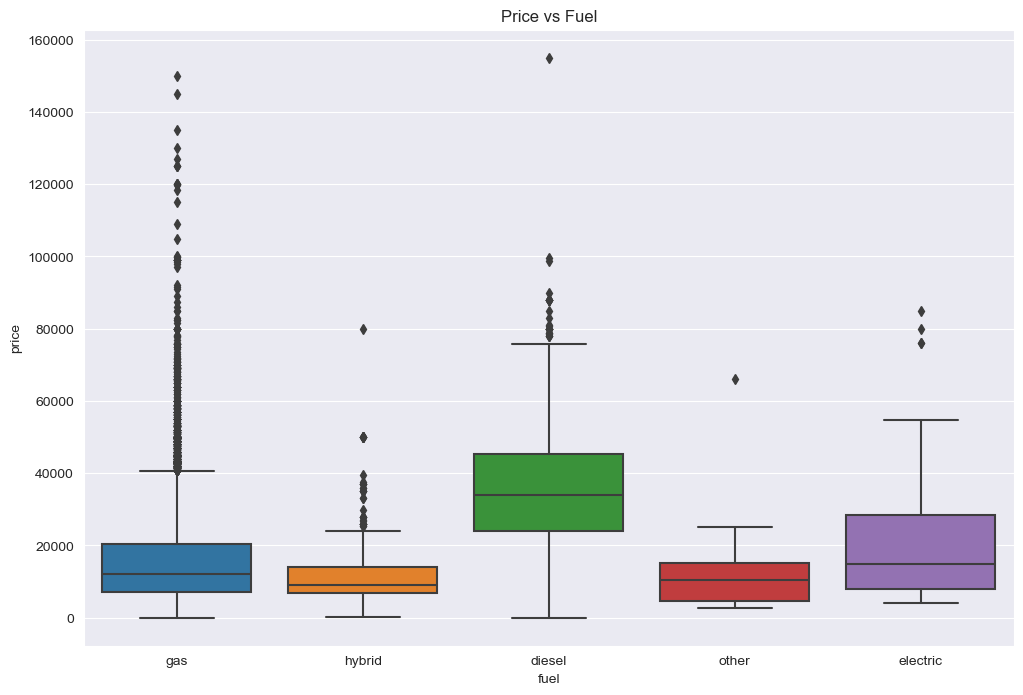

In [68]:
# Plot Price vs Year, Odometer, and Condition, and other features

plt.figure(figsize=(12,8))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Price vs Year')
plt.show()

plt.figure(figsize=(12,8))
sns.scatterplot(x='odometer', y='price', data=df)
plt.title('Price vs Odometer')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price vs Condition')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='cylinders', y='price', data=df)
plt.title('Price vs Cylinders')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price vs Fuel')
plt.show()



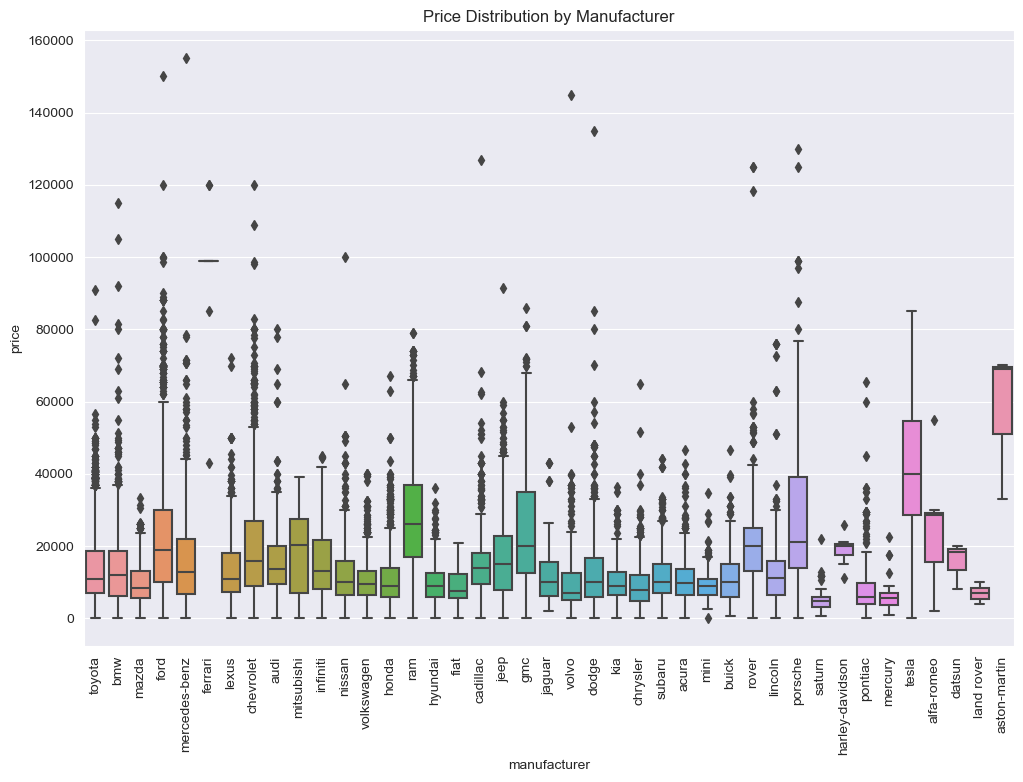

In [69]:


plt.figure(figsize=(12,8))
sns.boxplot(x='manufacturer', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Manufacturer')

plt.show()


D:\Anaconda\envs\UsedCarPricePrediction\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1200x800 with 0 Axes>

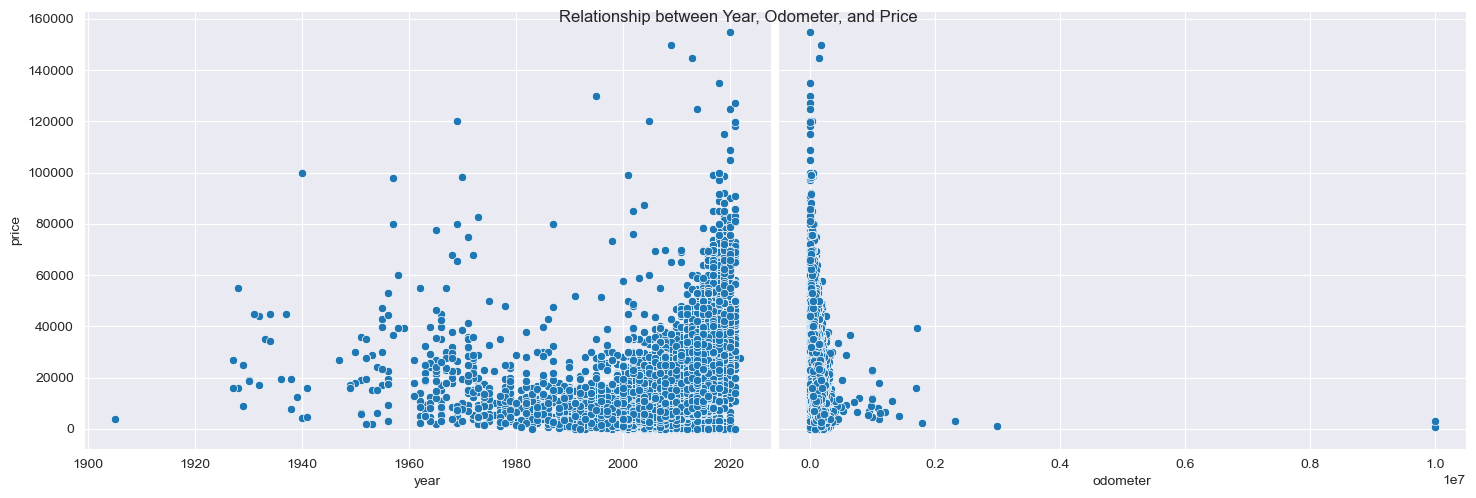

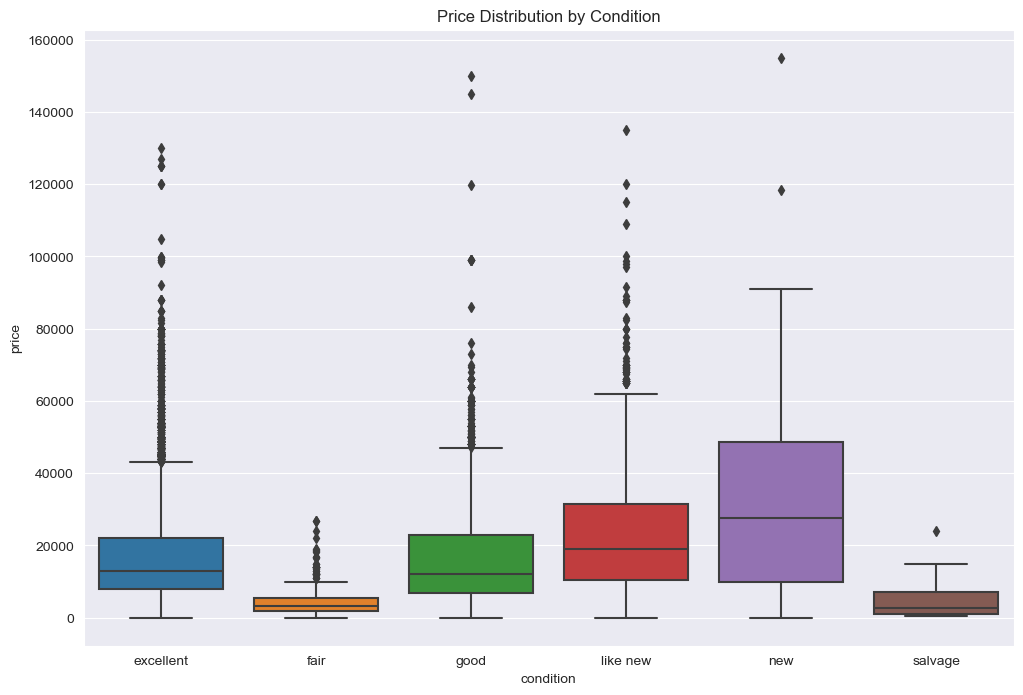

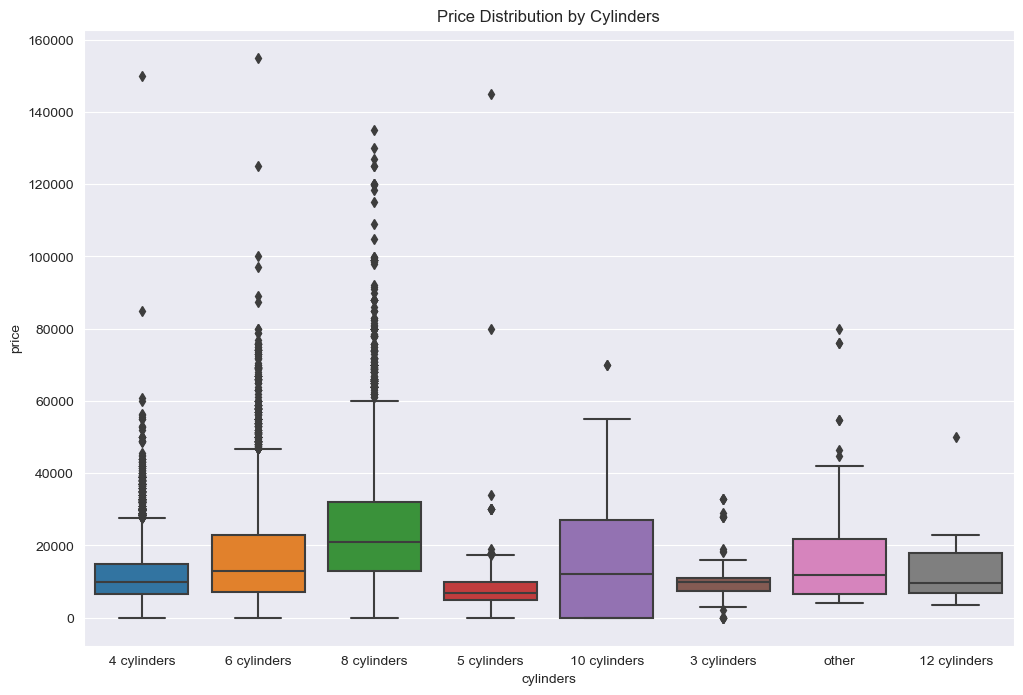

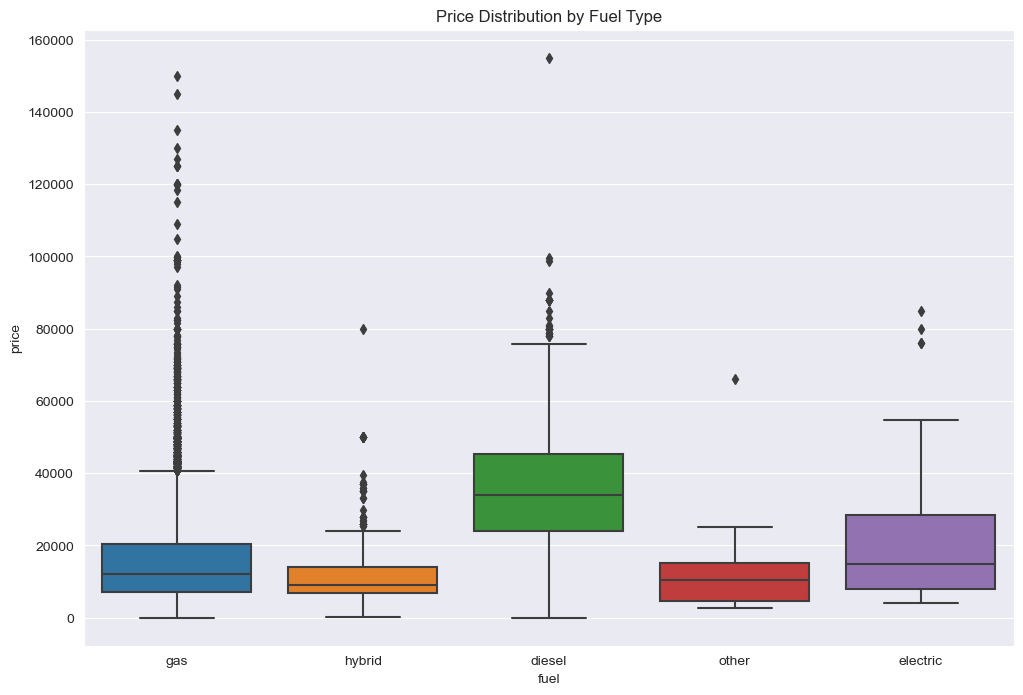

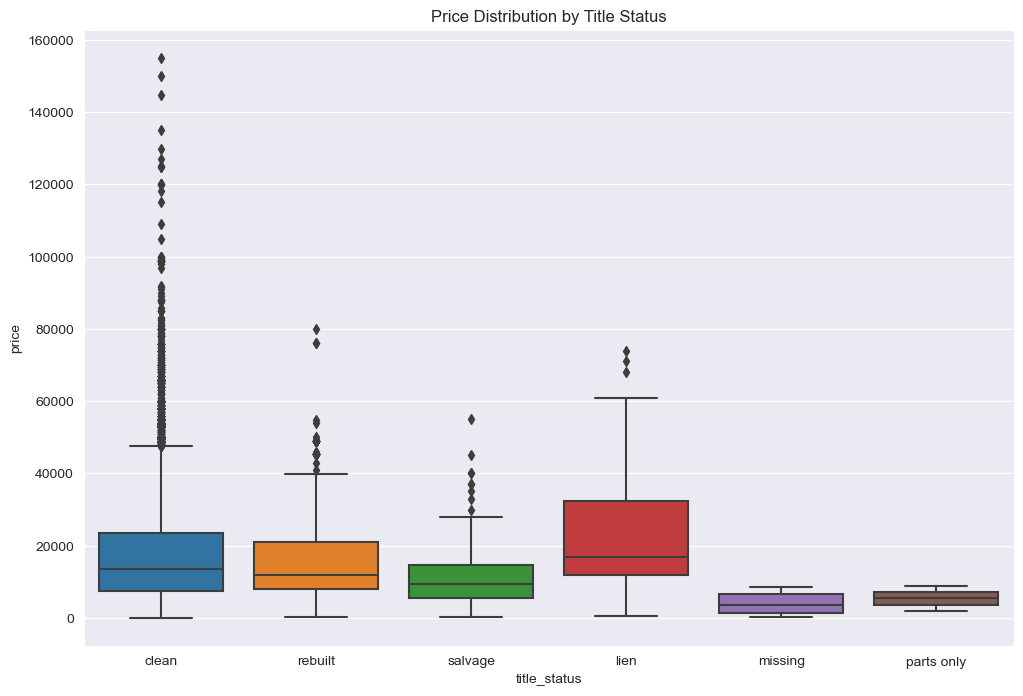

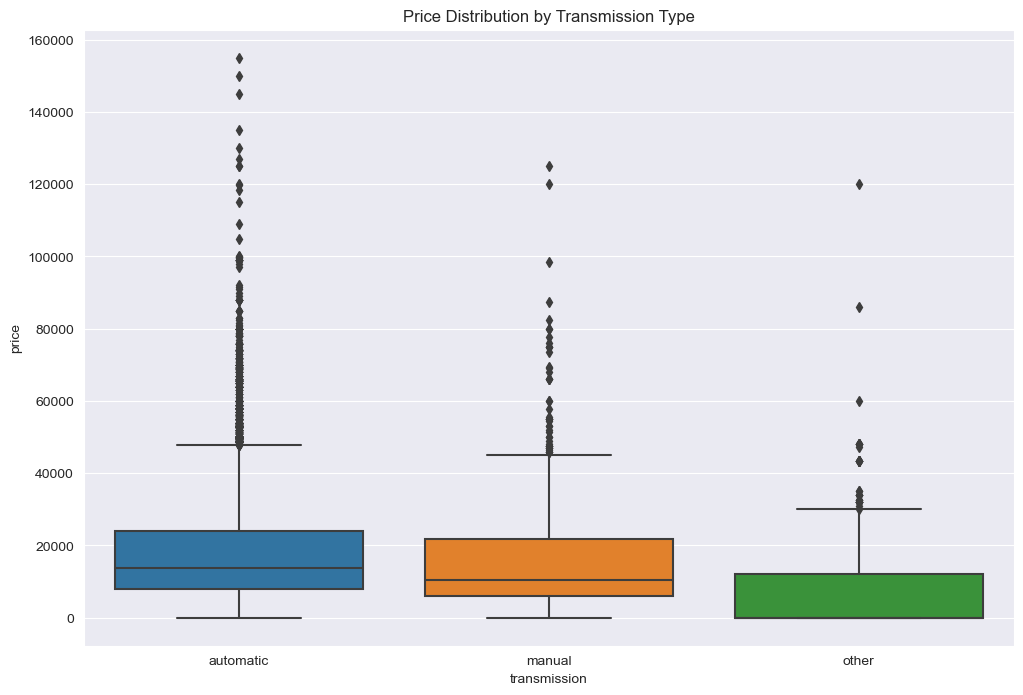

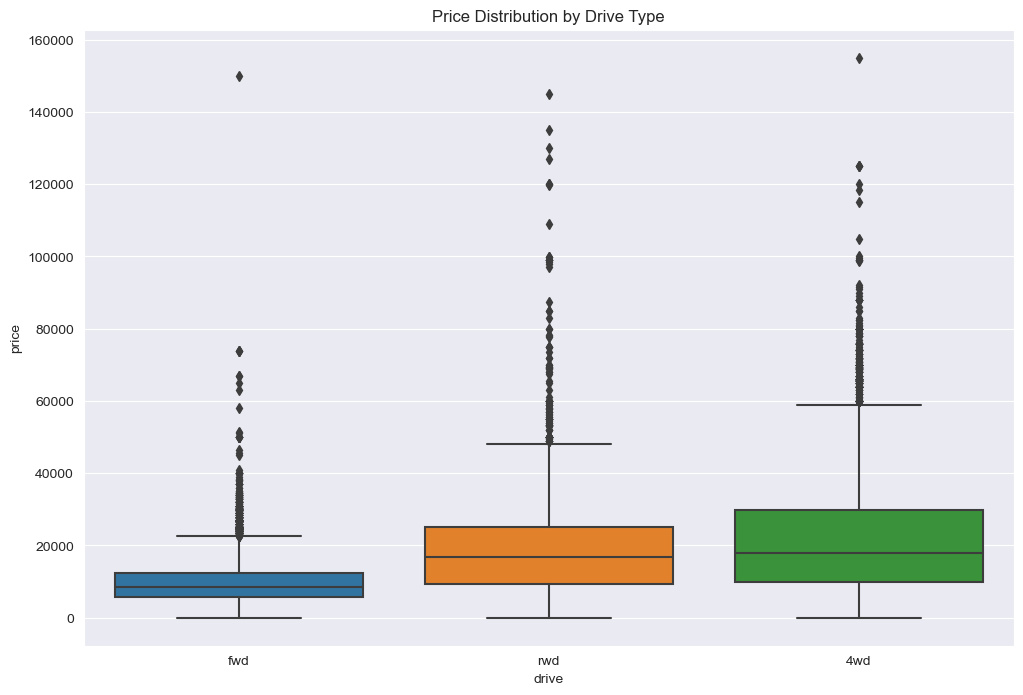

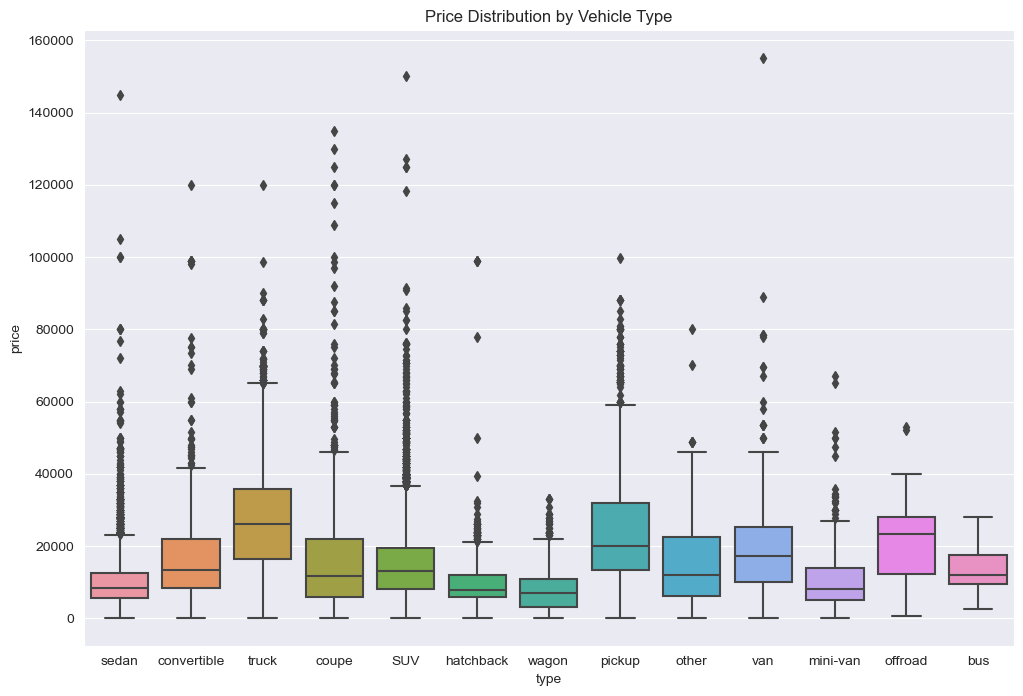

In [70]:
# Exploratory Data Analysis

# Visualize the relationship between the selected features and the target variable

plt.figure(figsize=(12,8))
sns.pairplot(df, x_vars=['year', 'odometer'], y_vars='price', height=5, aspect=1.5, kind='scatter')
plt.suptitle('Relationship between Year, Odometer, and Price')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Price Distribution by Condition')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='cylinders', y='price', data=df)
plt.title('Price Distribution by Cylinders')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='title_status', y='price', data=df)
plt.title('Price Distribution by Title Status')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='transmission', y='price', data=df)
plt.title('Price Distribution by Transmission Type')
plt.show()

plt.figure(figsize=(12,8))

sns.boxplot(x='drive', y='price', data=df)
plt.title('Price Distribution by Drive Type')
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x='type', y='price', data=df)
plt.title('Price Distribution by Vehicle Type')
plt.show()



### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [71]:
# Selecting features and target

X = df.drop('price', axis=1)
y = df['price']

In [72]:
# Encoding categorical data

from sklearn.preprocessing import OneHotEncoder

# Define categorical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type']
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [73]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.